In [1]:
import pandas as pd

**Reading Data**


In [3]:
# Load the Excel file
file = pd.ExcelFile('/content/sample_data/Banking_Analytics_Dataset.xlsx')

# Get the list of sheet names
sheet_names = file.sheet_names
sheet_names

['Customers', 'Accounts', 'Transactions', 'Loans', 'Cards', 'SupportCalls']

In [4]:
Customers=pd.read_excel('/content/sample_data/Banking_Analytics_Dataset.xlsx',sheet_name="Customers")
Customers.head()

,CustomerID,FirstName,LastName,Phone,Email,Address,JoinDate
0,1,Dustin,Diaz,(107)429-6508,jenniferbaker@montgomery-cardenas.com,"198 Elizabeth Bypass, Allenmouth, IN 60876",2019-12-08
1,2,Jessica,Anderson,+1-936-234-0473x4335,vanessamoses@velasquez.com,"PSC 6146, Box 0055, APO AE 83600",2016-03-03
2,3,Jeremy,Wagner,593-321-1624x10444,johntrujillo@golden.com,"636 John Oval Apt. 207, Angelfurt, HI 24913",2023-06-20
3,4,Crystal,Roberts,502-211-0360x097,stewartsean@gmail.com,"8398 Carter Views, North Austinhaven, RI 17496",2020-04-17
4,5,Anna,Bryant,776-228-1583x2038,jacobcantrell@gmail.com,"52819 Craig Springs Apt. 576, Steventown, MD 2...",2025-03-23


In [5]:
Customers[['CustomerID']].nunique() #I don't have violation in primary key

,0
CustomerID,5000


In [6]:
Customers.shape

(5000, 7)

In [7]:
Accounts=pd.read_excel('/content/sample_data/Banking_Analytics_Dataset.xlsx',sheet_name="Accounts")
Accounts.head()

,AccountID,CustomerID,AccountType,Balance,CreatedDate
0,1,1828,Savings,53911,2019-06-12
1,2,3740,Business,39910,2015-07-14
2,3,1247,Savings,75903,2018-03-23
3,4,3843,Business,47519,2024-12-14
4,5,4693,Savings,34233,2019-07-26


In [8]:
print(Accounts.shape)
print(Accounts[['AccountID']].nunique()) #I don't have violation in primary key

(5000, 5)
AccountID    5000
dtype: int64


In [9]:
Transactions=pd.read_excel('/content/sample_data/Banking_Analytics_Dataset.xlsx',sheet_name="Transactions")
Transactions.head()

,TransactionID,AccountID,TransactionType,Amount,TransactionDate
0,1,3913,Transfer,3150.12,2023-09-24
1,2,2591,Transfer,6212.12,2022-06-07
2,3,3277,Transfer,451.72,2024-11-24
3,4,3404,Deposit,8525.28,2023-04-06
4,5,4345,Deposit,7306.17,2025-01-21


In [10]:
Transactions.shape

(20000, 5)

In [11]:
Cards=pd.read_excel('/content/sample_data/Banking_Analytics_Dataset.xlsx',sheet_name="Cards")
Cards.head()

,CardID,CustomerID,CardType,CardNumber,IssuedDate,ExpirationDate
0,1,3648,Prepaid,6011716166637459,2023-04-18,2030-02-22
1,2,4795,Debit,4869068203653729,2022-08-12,2026-11-16
2,3,3209,Prepaid,3570969597122092,2023-04-25,2027-02-04
3,4,3357,Prepaid,6566794648369610,2023-09-25,2029-12-28
4,5,619,Debit,4605275219991485,2021-02-19,2026-09-12


In [12]:
Cards.shape

(4000, 6)

***For ensuring that not the whole customers have accounts***

In [13]:
Cards['CustomerID'].unique().shape

(2745,)

In [14]:
Customers_Cards=pd.DataFrame(Cards.groupby('CustomerID')['CardID'].count())
Customers_Cards.sort_values(by='CardID', ascending=False) #That means not the whole customers have cards

,CardID
CustomerID,
4896,5
3215,5
637,5
130,4
1901,4
...,...
4994,1
4991,1
4988,1


In [15]:
Customers_Cards.shape

(2745, 1)

************************************

In [16]:
Customers_info_accounts=pd.merge(Customers, Accounts, on='CustomerID', how='inner')
Customers_info_accounts.head()

,CustomerID,FirstName,LastName,Phone,Email,Address,JoinDate,AccountID,AccountType,Balance,CreatedDate
0,1,Dustin,Diaz,(107)429-6508,jenniferbaker@montgomery-cardenas.com,"198 Elizabeth Bypass, Allenmouth, IN 60876",2019-12-08,2982,Business,25463,2022-07-28
1,2,Jessica,Anderson,+1-936-234-0473x4335,vanessamoses@velasquez.com,"PSC 6146, Box 0055, APO AE 83600",2016-03-03,1064,Business,20529,2019-07-28
2,3,Jeremy,Wagner,593-321-1624x10444,johntrujillo@golden.com,"636 John Oval Apt. 207, Angelfurt, HI 24913",2023-06-20,3143,Savings,49912,2016-05-29
3,3,Jeremy,Wagner,593-321-1624x10444,johntrujillo@golden.com,"636 John Oval Apt. 207, Angelfurt, HI 24913",2023-06-20,4693,Checking,94620,2023-06-20
4,4,Crystal,Roberts,502-211-0360x097,stewartsean@gmail.com,"8398 Carter Views, North Austinhaven, RI 17496",2020-04-17,3616,Business,52596,2020-03-24


In [17]:
Customers_info_accounts.shape

(5000, 11)

In [24]:
Customers_info_accounts_cards=pd.merge(Customers_info_accounts,Cards ,on='CustomerID', how='left')
Customers_info_accounts_cards.head()

,CustomerID,FirstName,LastName,Phone,Email,Address,JoinDate,AccountID,AccountType,Balance,CreatedDate,CardID,CardType,CardNumber,IssuedDate,ExpirationDate
0,1,Dustin,Diaz,(107)429-6508,jenniferbaker@montgomery-cardenas.com,"198 Elizabeth Bypass, Allenmouth, IN 60876",2019-12-08,2982,Business,25463,2022-07-28,564.0,Prepaid,2.270708e+15,2023-06-29,2027-10-23
1,1,Dustin,Diaz,(107)429-6508,jenniferbaker@montgomery-cardenas.com,"198 Elizabeth Bypass, Allenmouth, IN 60876",2019-12-08,2982,Business,25463,2022-07-28,2932.0,Prepaid,6.390746e+11,2022-08-17,2027-08-13
2,2,Jessica,Anderson,+1-936-234-0473x4335,vanessamoses@velasquez.com,"PSC 6146, Box 0055, APO AE 83600",2016-03-03,1064,Business,20529,2019-07-28,NaN,NaN,NaN,NaT,NaT
3,3,Jeremy,Wagner,593-321-1624x10444,johntrujillo@golden.com,"636 John Oval Apt. 207, Angelfurt, HI 24913",2023-06-20,3143,Savings,49912,2016-05-29,NaN,NaN,NaN,NaT,NaT
4,3,Jeremy,Wagner,593-321-1624x10444,johntrujillo@golden.com,"636 John Oval Apt. 207, Angelfurt, HI 24913",2023-06-20,4693,Checking,94620,2023-06-20,NaN,NaN,NaN,NaT,NaT


In [25]:
Customers_info_accounts_cards.shape #maybe customer has more than one card and customers does not have cards

(6177, 16)

In [26]:
Customers_info_accounts_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      6177 non-null   int64         
 1   FirstName       6177 non-null   object        
 2   LastName        6177 non-null   object        
 3   Phone           6177 non-null   object        
 4   Email           6177 non-null   object        
 5   Address         6177 non-null   object        
 6   JoinDate        6177 non-null   datetime64[ns]
 7   AccountID       6177 non-null   int64         
 8   AccountType     6177 non-null   object        
 9   Balance         6177 non-null   int64         
 10  CreatedDate     6177 non-null   datetime64[ns]
 11  CardID          3967 non-null   float64       
 12  CardType        3967 non-null   object        
 13  CardNumber      3967 non-null   float64       
 14  IssuedDate      3967 non-null   datetime64[ns]
 15  Expi

In [39]:
import numpy as np
customer_cards_count=Customers_info_accounts_cards.groupby('CustomerID').size()
np.sort(customer_cards_count.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 15, 20])

In [40]:
data=pd.merge(Customers_info_accounts,Transactions ,on='AccountID', how='inner')
data.head()

,CustomerID,FirstName,LastName,Phone,Email,Address,JoinDate,AccountID,AccountType,Balance,CreatedDate,TransactionID,TransactionType,Amount,TransactionDate
0,1,Dustin,Diaz,(107)429-6508,jenniferbaker@montgomery-cardenas.com,"198 Elizabeth Bypass, Allenmouth, IN 60876",2019-12-08,2982,Business,25463,2022-07-28,2288,Payment,7085.32,2024-10-14
1,1,Dustin,Diaz,(107)429-6508,jenniferbaker@montgomery-cardenas.com,"198 Elizabeth Bypass, Allenmouth, IN 60876",2019-12-08,2982,Business,25463,2022-07-28,5367,Deposit,3436.87,2023-05-13
2,1,Dustin,Diaz,(107)429-6508,jenniferbaker@montgomery-cardenas.com,"198 Elizabeth Bypass, Allenmouth, IN 60876",2019-12-08,2982,Business,25463,2022-07-28,6144,Deposit,1115.28,2022-07-16
3,1,Dustin,Diaz,(107)429-6508,jenniferbaker@montgomery-cardenas.com,"198 Elizabeth Bypass, Allenmouth, IN 60876",2019-12-08,2982,Business,25463,2022-07-28,7550,Withdrawal,3823.18,2024-03-19
4,2,Jessica,Anderson,+1-936-234-0473x4335,vanessamoses@velasquez.com,"PSC 6146, Box 0055, APO AE 83600",2016-03-03,1064,Business,20529,2019-07-28,8754,Transfer,8824.33,2025-02-21


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       20000 non-null  int64         
 1   FirstName        20000 non-null  object        
 2   LastName         20000 non-null  object        
 3   Phone            20000 non-null  object        
 4   Email            20000 non-null  object        
 5   Address          20000 non-null  object        
 6   JoinDate         20000 non-null  datetime64[ns]
 7   AccountID        20000 non-null  int64         
 8   AccountType      20000 non-null  object        
 9   Balance          20000 non-null  int64         
 10  CreatedDate      20000 non-null  datetime64[ns]
 11  TransactionID    20000 non-null  int64         
 12  TransactionType  20000 non-null  object        
 13  Amount           20000 non-null  float64       
 14  TransactionDate  20000 non-null  datet

In [42]:
data.isna().sum() #Checking the null values

,0
CustomerID,0
FirstName,0
LastName,0
Phone,0
Email,0
Address,0
JoinDate,0
AccountID,0
AccountType,0
Balance,0


In [43]:
data.columns #previous transaction date

Index(['CustomerID', 'FirstName', 'LastName', 'Phone', 'Email', 'Address',
       'JoinDate', 'AccountID', 'AccountType', 'Balance', 'CreatedDate',
       'TransactionID', 'TransactionType', 'Amount', 'TransactionDate'],
      dtype='object')

In [44]:
data[['JoinDate','Balance','Amount','TransactionDate']].describe()

,JoinDate,Balance,Amount,TransactionDate
count,20000,20000.00000,20000.000000,20000
mean,2020-04-02 01:15:44.640000,49691.19215,5005.444508,2023-11-08 01:34:27.840000
min,2015-05-14 00:00:00,147.00000,10.180000,2022-05-12 00:00:00
25%,2017-10-19 00:00:00,24506.75000,2527.917500,2023-02-05 00:00:00
50%,2020-03-28 00:00:00,49364.00000,5011.605000,2023-11-04 00:00:00
75%,2022-09-29 00:00:00,74967.00000,7495.767500,2024-08-08 06:00:00
max,2025-05-10 00:00:00,99968.00000,9999.890000,2025-05-11 00:00:00
std,NaN,28854.49674,2886.346765,NaN


In [45]:
data.nunique() # There are customers doesn't have any transactions

,0
CustomerID,3144
FirstName,530
LastName,820
Phone,3144
Email,3139
Address,3144
JoinDate,2074
AccountID,4919
AccountType,3
Balance,4793


In [46]:
data.dtypes

,0
CustomerID,int64
FirstName,object
LastName,object
Phone,object
Email,object
Address,object
JoinDate,datetime64[ns]
AccountID,int64
AccountType,object
Balance,int64


***Univariate analysis***

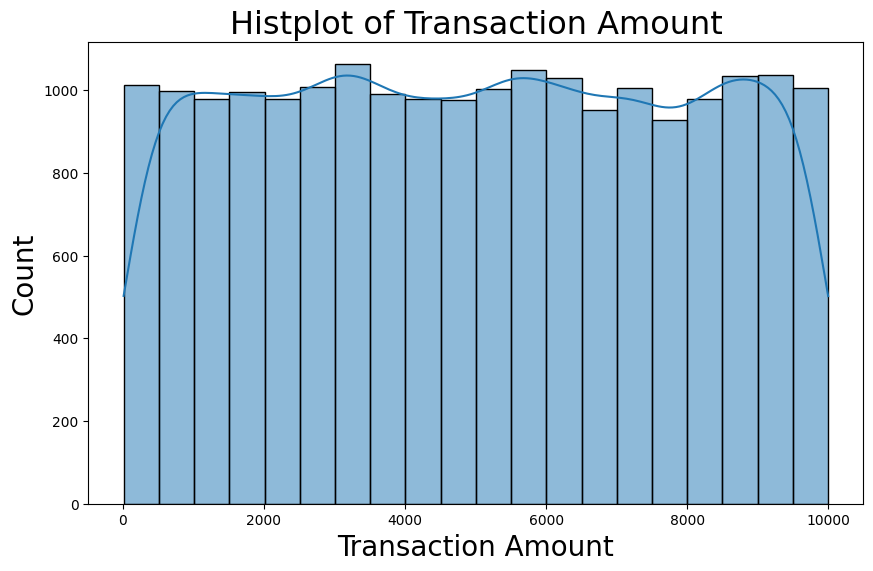

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

plt.xlabel("Transaction Amount", fontsize=20)
plt.ylabel("Count", fontsize=20)

plt.title("Histplot of Transaction Amount", fontsize=23)

sns.histplot(data=data, x="Amount", kde=True,bins=20)

plt.show()



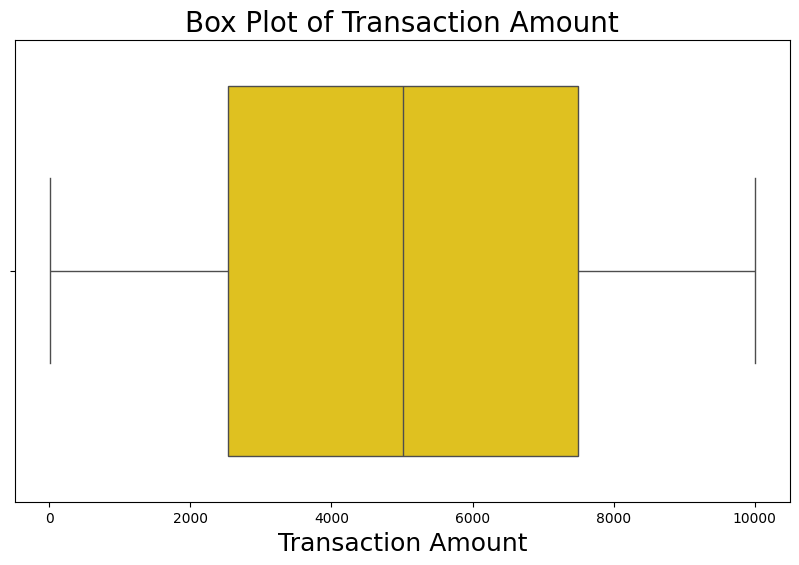

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Amount'], color='gold')

plt.title('Box Plot of Transaction Amount', fontsize=20)
plt.xlabel('Transaction Amount', fontsize=18)

plt.show() #There are no outlieres values

In [49]:
data['TransactionType'].value_counts() #Data is nearly balanced

,count
TransactionType,
Payment,5056
Transfer,5055
Deposit,4970
Withdrawal,4919


In [50]:
Payment = data[data['TransactionType']=='Payment']['TransactionType'].count()
Transfer =data[data['TransactionType']=='Transfer']['TransactionType'].count()
Deposit = data[data['TransactionType']=='Deposit']['TransactionType'].count()
Withdrawal =data[data['TransactionType']=='Withdrawal']['TransactionType'].count()

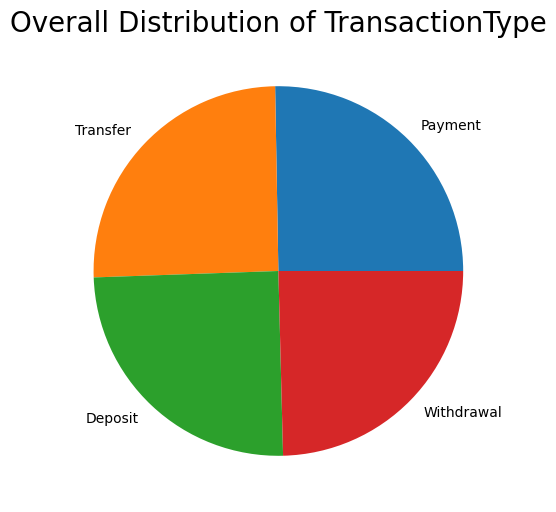

In [51]:


plt.figure(figsize=(10,6))

index_values = [Payment,Transfer,Deposit,Withdrawal]
index_labels = ['Payment','Transfer','Deposit','Withdrawal']

plt.pie(index_values, labels = index_labels)

plt.title('Overall Distribution of TransactionType', fontsize=20)

plt.show()



In [ ]:
from datetime import datetime

TransactionDay
2022-05-12    22
2022-05-13    22
2022-05-14    24
2022-05-15    19
2022-05-16    21
              ..
2025-05-07    14
2025-05-08    23
2025-05-09    14
2025-05-10    23
2025-05-11    14
Length: 1096, dtype: int64


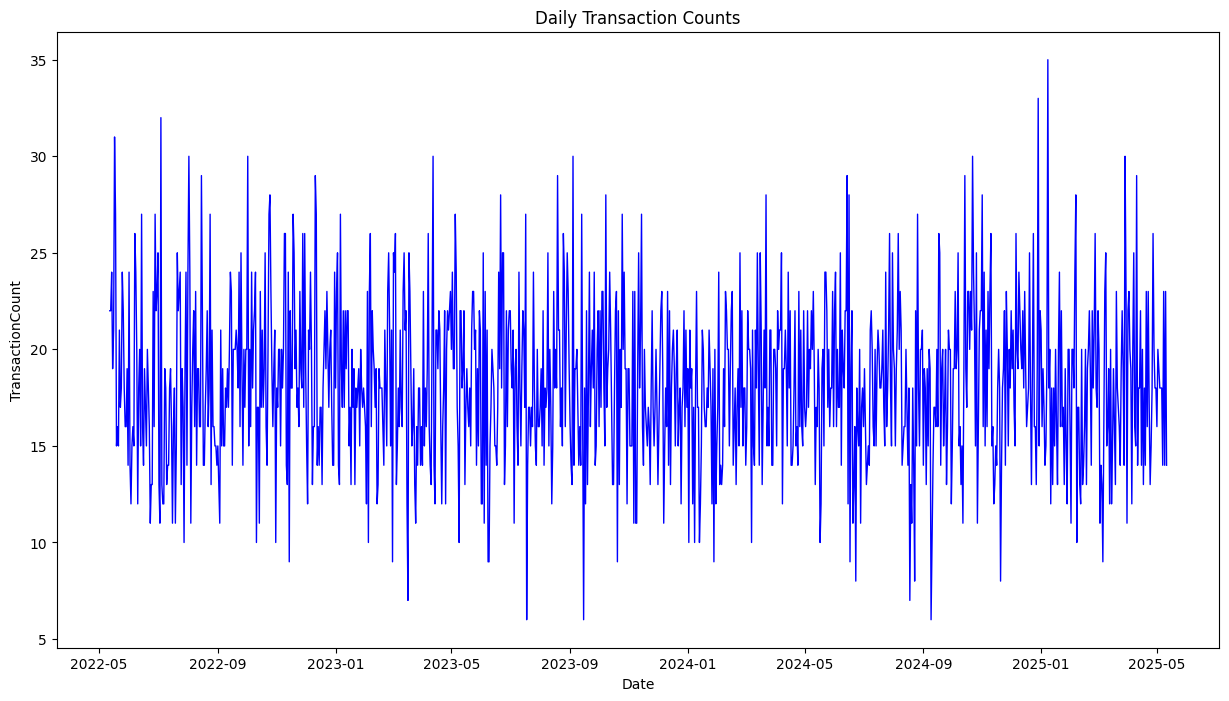

In [52]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['TransactionDay'] = data['TransactionDate'].dt.date
daily_counts = data.groupby('TransactionDay').size() #count gives count of each column in the dataframe
print(daily_counts)
plt.figure(figsize=(15,8))
daily_counts.plot(title='Daily Transaction Counts', color='blue', linewidth=1)
plt.xlabel('Date')
plt.ylabel('TransactionCount')
plt.show()

In [76]:
data['year']=data['TransactionDate'].dt.year
data['month']=data['TransactionDate'].dt.strftime('%B')#dt.month_name()

In [63]:
year=data.groupby('year').size()#data of four years
print(year)

year
2022    4359
2023    6653
2024    6645
2025    2343
dtype: int64


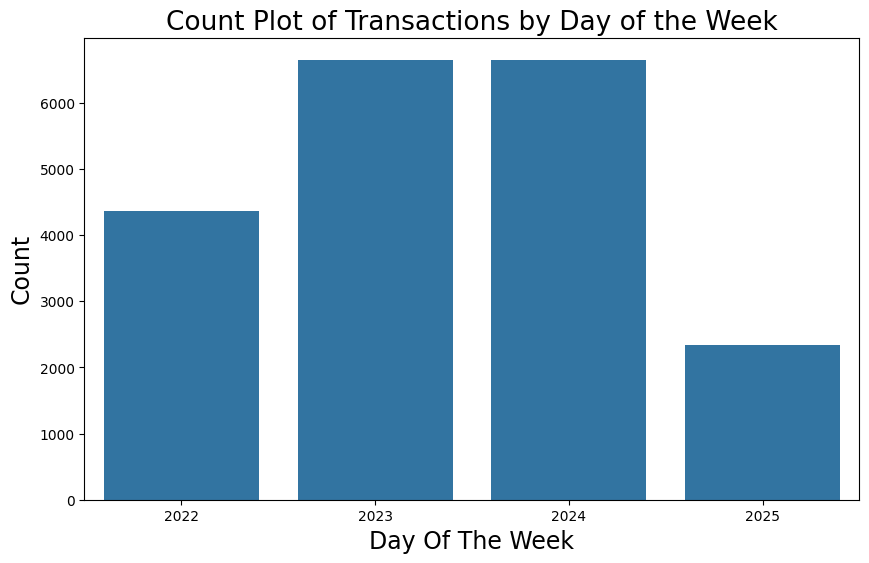

In [64]:
plt.figure(figsize=(10,6)) #The highest transactions in 2023,2024
sns.countplot(data=data, x='year', order=['2022', '2023', '2024', '2025'])
plt.title('Count Plot of Transactions by Day of the Week', fontsize=19)
plt.xlabel('Day Of The Week', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

<ipython-input-79-640bf1d5b8e1>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_transaction_count=data.groupby('month').size()#.reset_index(name='transaction_count').sort_values('month')#the data for the whole months


month
January      1627
February     1533
March        1651
April        1671
May          1756
June         1614
July         1645
August       1719
September    1593
October      1801
November     1656
December     1734
dtype: int64


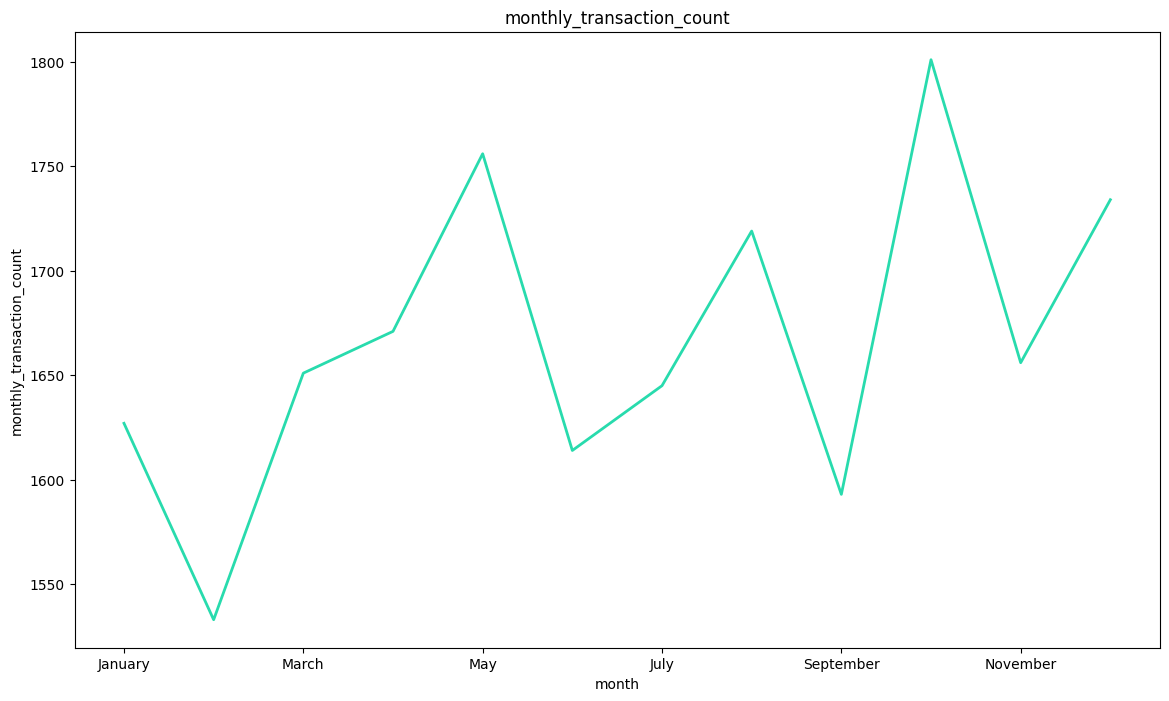

In [79]:
from pandas.api.types import CategoricalDtype

# Define correct order of months
month_order = CategoricalDtype(
    categories=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ],
    ordered=True
)

# Apply to 'month' column
data['month'] = data['month'].astype(month_order)

monthly_transaction_count=data.groupby('month').size()#.reset_index(name='transaction_count').sort_values('month')#the data for the whole months
print(monthly_transaction_count)
plt.figure(figsize=(14,8))
monthly_transaction_count.plot(title='monthly_transaction_count', color='#28DBAD', linewidth=2)
plt.xlabel('month')
plt.ylabel('monthly_transaction_count')
plt.show()



0          Monday
1        Saturday
2        Saturday
3         Tuesday
4          Friday
           ...   
19995     Tuesday
19996    Thursday
19997     Tuesday
19998     Tuesday
19999      Sunday
Name: DayOfWeek, Length: 20000, dtype: object


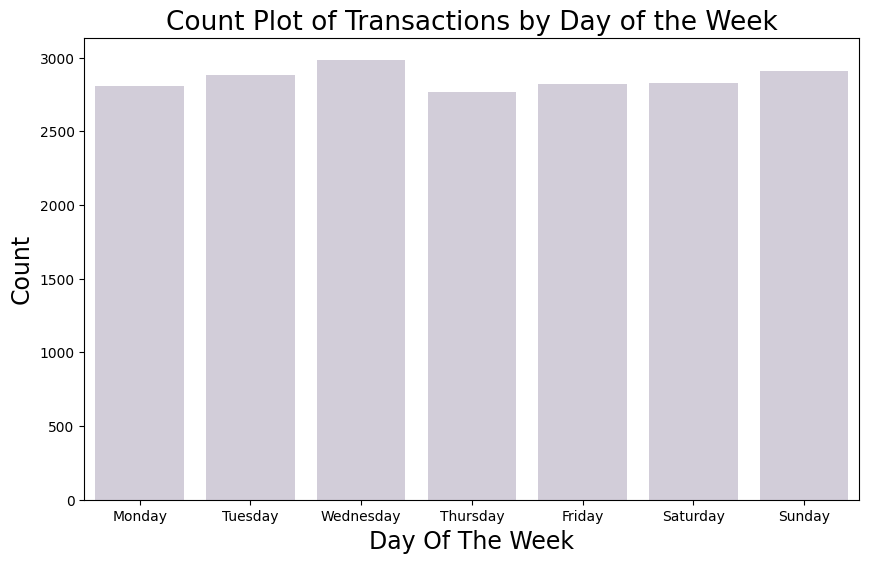

In [81]:
data['DayOfWeek'] = data['TransactionDate'].dt.day_name()
print(data['DayOfWeek'])
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],color='#D2CBDB')
plt.title('Count Plot of Transactions by Day of the Week', fontsize=19)
plt.xlabel('Day Of The Week', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.show()

<ipython-input-82-1049d2f94738>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='Balance', shade=True, color='navy')


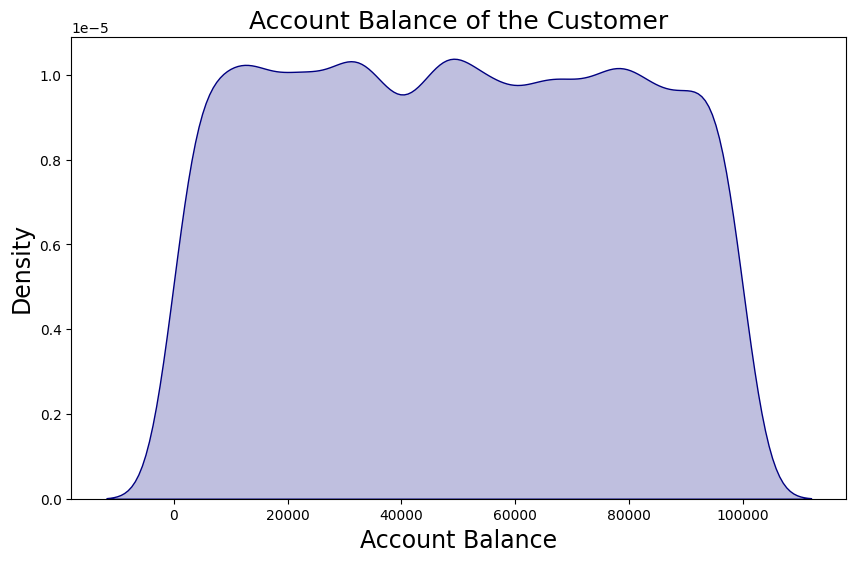

In [82]:
#to give you a clear picture of where my data points cluster
plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x='Balance', shade=True, color='navy')

plt.xlabel('Account Balance', fontsize=17)
plt.ylabel('Density', fontsize=17)

plt.title('Account Balance of the Customer', fontsize=18)
plt.show()

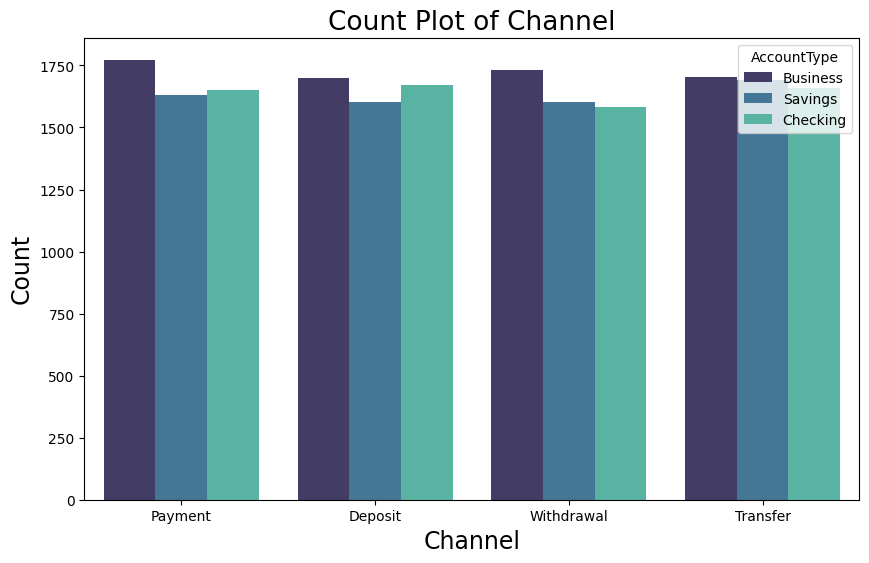

In [83]:
plt.figure(figsize=(10,6)) #Transaction type vs account type ...in each transaction type which account type is high

sns.countplot(data=data, x='TransactionType', hue='AccountType', palette='mako')

plt.xlabel('Channel', fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.title('Count Plot of Channel', fontsize=19)

plt.show()

<ipython-input-84-04b95a241929>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['Amount'], y=data['TransactionType'], palette='plasma')


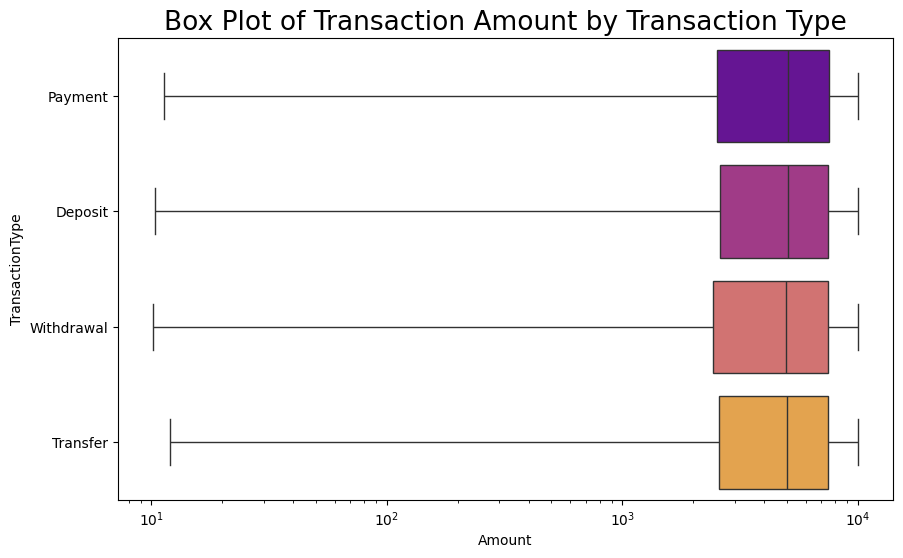

In [84]:
plt.figure(figsize=(10,6))
#If there are outliers in each account
sns.boxplot(data=data, x=data['Amount'], y=data['TransactionType'], palette='plasma')
plt.xscale('log') #Log scale to show outliers
plt.title('Box Plot of Transaction Amount by Transaction Type', fontsize=19)

plt.show()

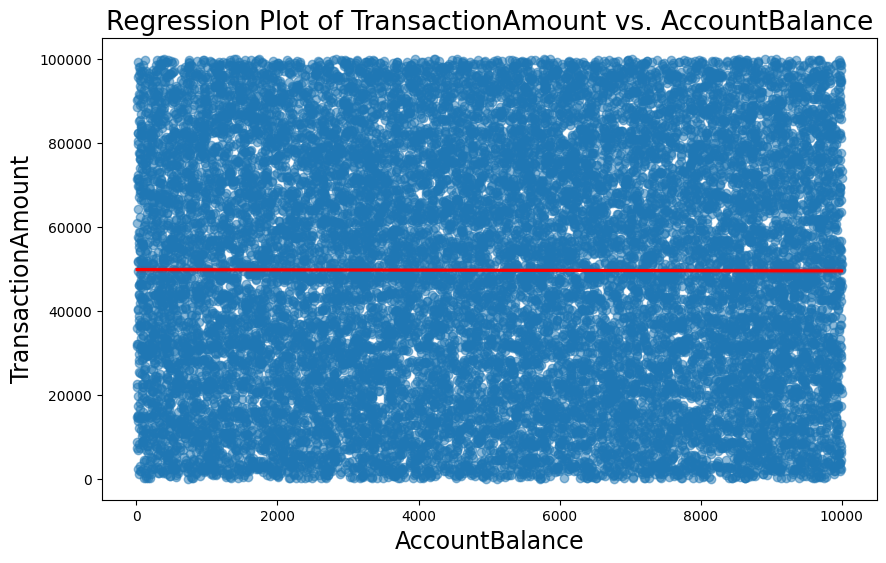

In [85]:
#comparing account balance and transaction amount
'''This is a useful pattern when modeling customer behavior or detecting anomalies (e.g., someone with a low balance suddenly making a large transaction)
the plot for visually exploring correlation
Spot patterns or anomalies in financial behavior
to analyze the relationship between TransactionAmount and AccountBalance
if people with higher account balances make larger transactions?"
A positive slope means: larger balances → larger transactions
A flat or negative slope means: no or inverse relationship
'''
plt.figure(figsize=(10,6))

sns.regplot(y='Balance', x='Amount', data=data, scatter_kws = {'alpha':0.5}, line_kws={'color':'red'})

plt.title('Regression Plot of TransactionAmount vs. AccountBalance', fontsize=19)

plt.xlabel('AccountBalance', fontsize=17)
plt.ylabel('TransactionAmount', fontsize=17)

plt.show()

#There is no correleation between the account balance and transaction amount as the line is flat

In [89]:
data.columns

Index(['CustomerID', 'FirstName', 'LastName', 'Phone', 'Email', 'Address',
       'JoinDate', 'AccountID', 'AccountType', 'Balance', 'CreatedDate',
       'TransactionID', 'TransactionType', 'Amount', 'TransactionDate',
       'TransactionDay', 'year', 'month', 'DayOfWeek'],
      dtype='object')

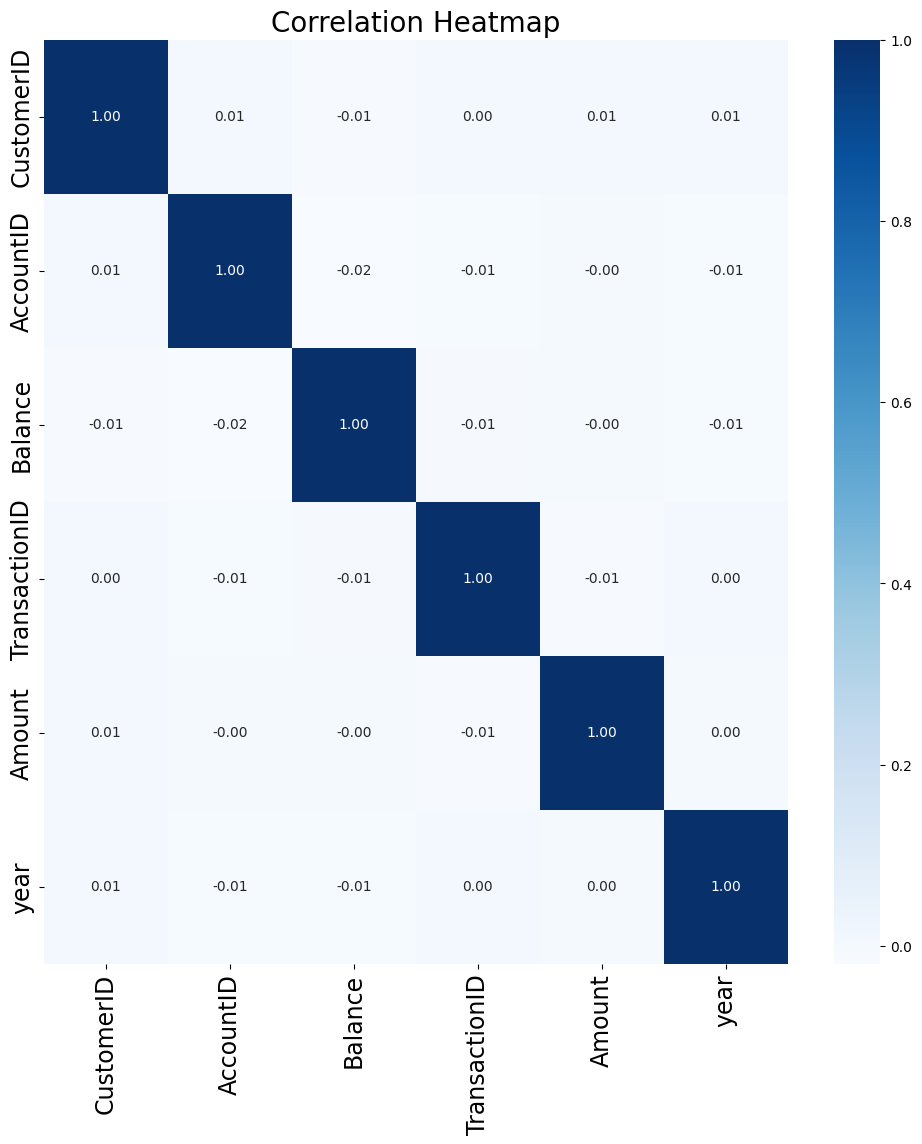

In [96]:
import numpy as np

plt.figure(figsize=(12,12))
'''df=data[[
       'JoinDate', 'AccountID', 'AccountType', 'Balance', 'CreatedDate',
       'TransactionID', 'TransactionType', 'Amount', 'TransactionDate']]
'''
numeric_columns = data.select_dtypes(include=np.number).columns
correlation_matrix = data[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.xticks(rotation=90, fontsize=17)
plt.yticks(fontsize=17)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()



In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecting features for clustering
features = ['Balance', 'Amount']
X = data[features].dropna() # Handle missing values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

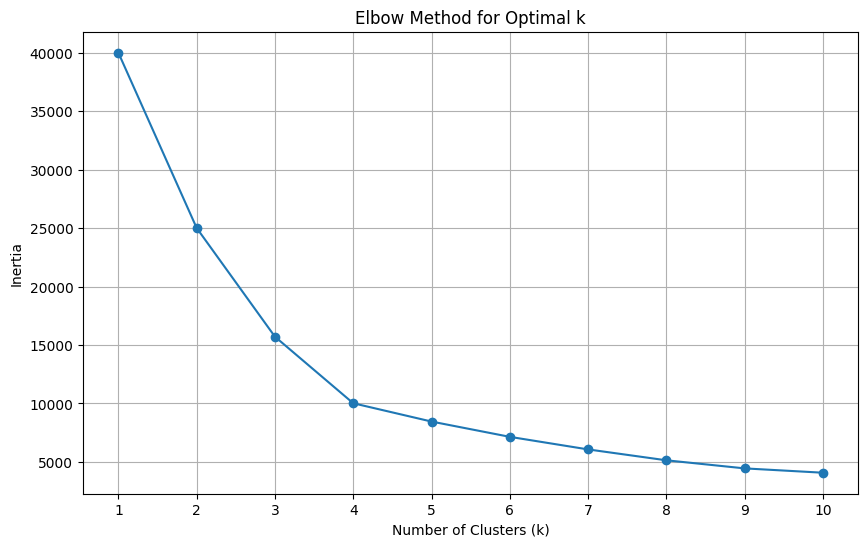

In [103]:
# Determine the optimal number of clusters using the elbow method
inertia = []
# Try a range of cluster numbers, for example from 1 to 10
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

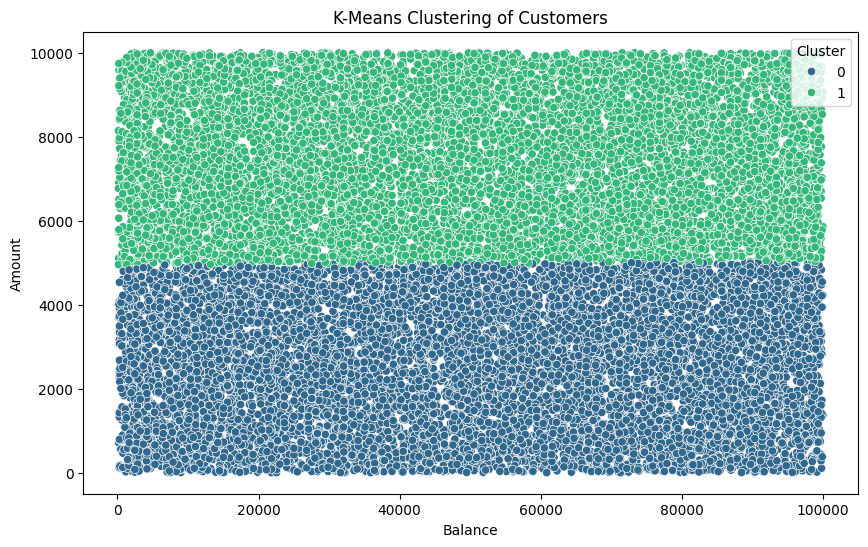


Cluster Analysis:
              Balance       Amount
Cluster                           
0        49848.587562  2494.795275
1        49535.269334  7492.604040


In [110]:
# Based on the elbow plot, choose an optimal number of clusters
optimal_k = 2 # the value observed from the plot

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Set n_init explicitly
data['Cluster'] = kmeans.fit_predict(X_scaled)

# If you dropped rows with NaN, you need to be careful mapping clusters back.
# Let's add the cluster to the DataFrame used for clustering (X) and then potentially merge
X['Cluster'] = kmeans.labels_
# If you need the cluster assignments in the original 'data' DataFrame, you'll need a strategy
# to align them, especially if you dropped rows.

# Visualize the clusters (for 2 features)
if len(features) == 2:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=X, x=features[0], y=features[1], hue='Cluster', palette='viridis')
    plt.title('K-Means Clustering of Customers')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

# You can now analyze the characteristics of each cluster in the 'X' DataFrame
print("\nCluster Analysis:")
print(X.groupby('Cluster')[features].mean())
